In [20]:
from shared import *
args = SimpleParser()
args.from_dict({})
args.process_args()

In [21]:
df_feature_1h = pd.read_csv(os.path.join(args.feature_dir, 'features_0.csv'))
df_labels = pd.read_csv(args.label_src)
df_request = pd.read_csv(args.req_src)
df = df_feature_1h.join(df_labels.set_index('trip_id'), on='trip_id')
df = df.join(df_request.set_index('trip_id'), on='trip_id')
df.head()

,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,Unnamed: 0,passenger_count,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_ntaname,dropoff_ntaname,trip_distance
0,43.0,551.953488,2.093953,9.313953,1.092791,11.335581,23734.0,90.040000,400.500000,46.990000,...,517450.0,5.0,2015-08-02 11:17:35,-73.962822,40.766739,-73.980911,40.762421,Upper East Side-Carnegie Hill,Midtown-Midtown South,1.56
1,235.0,776.131915,2.084000,11.093617,1.131957,13.282766,182391.0,489.740000,2607.000000,266.010001,...,2351860.0,2.0,2015-08-07 09:34:09,-73.988136,40.748470,-73.974731,40.742023,Midtown-Midtown South,Murray Hill-Kips Bay,1.40
2,462.0,573.266234,2.894069,11.156926,1.622294,13.903268,264849.0,1337.060001,5154.500000,749.500002,...,781021.0,1.0,2015-08-03 07:30:35,-73.950058,40.771931,-73.953583,40.775494,Yorkville,Yorkville,0.92
3,2235.0,709.118568,1.645280,9.586935,1.353409,12.772694,1584880.0,3677.200000,21426.799999,3024.870009,...,3537019.0,1.0,2015-08-10 18:35:54,-73.984459,40.746353,-73.988838,40.754169,Midtown-Midtown South,Midtown-Midtown South,0.80
4,672.0,721.577381,2.496250,11.145536,1.699345,14.225655,484900.0,1677.479999,7489.799999,1141.960001,...,2234252.0,1.0,2015-08-06 23:28:38,-73.983330,40.730366,-73.987595,40.750015,East Village,Midtown-Midtown South,1.95


In [22]:
df.describe()

,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,tip_amount,tolls_amount,total_amount,Unnamed: 0,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance
count,10000.000000,9778.000000,9778.000000,9778.000000,9778.000000,9778.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,531.568700,714.884116,8.222181,11.422988,1.495621,14.287500,3.678838e+05,6.951972e+03,5519.907542,745.906560,...,1.673138,0.323606,16.307105,2.357432e+06,2.000000,-73.242603,40.344289,-73.233111,40.345857,2.684900
std,578.627729,240.744235,241.216991,5.295715,0.794242,6.594364,4.076831e+05,1.666032e+05,5800.179382,805.188590,...,2.337488,1.410554,13.532013,1.465402e+06,1.608061,7.398265,4.075237,7.397410,4.075432,3.466927
min,0.000000,45.000000,0.200000,3.500000,0.000000,4.800000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.663000e+03,1.000000,-74.016396,0.000000,-74.181648,0.000000,0.330000
25%,86.000000,594.569892,1.751704,9.331850,1.160510,11.678286,6.101975e+04,2.082575e+02,980.000000,120.467500,...,0.000000,0.000000,8.800000,1.165027e+06,1.000000,-73.994225,40.737015,-73.991055,40.736050,0.900000
50%,365.000000,670.318606,2.020100,10.042129,1.337695,12.648807,2.509670e+05,8.103000e+02,3941.000000,501.875002,...,1.080000,0.000000,11.800000,2.357388e+06,1.000000,-73.985176,40.750874,-73.981667,40.754536,1.475000
75%,735.000000,749.708554,2.462244,10.968287,1.526382,13.743024,5.029220e+05,1.501335e+03,7612.125000,1044.610004,...,2.260000,0.000000,17.800000,3.517428e+06,2.000000,-73.969397,40.764222,-73.960224,40.770289,2.735000
max,2917.000000,2961.000000,17742.007406,52.000000,14.366667,70.010002,2.060821e+06,8.001645e+06,28487.300000,4234.280012,...,30.500000,20.830000,275.300000,5.090151e+06,6.000000,0.000000,40.809628,0.000000,40.825802,23.000000


In [23]:
corr = df.corr()
corr

/tmp/ipykernel_595342/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,tip_amount,tolls_amount,total_amount,Unnamed: 0,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance
count_1h,1.000000,-0.088898,0.018887,-0.184030,-0.109148,-0.170858,0.979542,0.074090,0.969434,0.952235,...,-0.025811,-0.076642,-0.102276,0.092170,-4.819324e-01,-0.089128,0.088575,-0.089477,0.088382,-0.089149
avg_trip_duration_1h,-0.088898,1.000000,0.010540,0.897202,0.773326,0.892363,0.044609,0.001268,0.079168,0.086141,...,0.286199,0.409823,0.514880,0.123549,-8.326885e-02,-0.312491,-0.403249,-0.265418,-0.181640,-0.084051
avg_trip_distance_1h,0.018887,0.010540,1.000000,0.006337,0.009460,0.006869,0.020714,0.857108,0.021395,0.024091,...,-0.004084,-0.001901,-0.003657,-0.193082,-2.248844e-02,-0.273410,-0.351117,0.210805,-0.159497,0.289273
avg_fare_amount_1h,-0.184030,0.897202,0.006337,1.000000,0.869239,0.995365,-0.070013,-0.005429,-0.000123,0.010489,...,0.308394,0.442762,0.557169,-0.101868,-8.163531e-02,-0.348614,-0.429970,0.068629,-0.230705,0.210564
avg_tip_amount_1h,-0.109148,0.773326,0.009460,0.869239,1.000000,0.901762,-0.001985,0.002420,0.068455,0.106658,...,0.301551,0.382973,0.494298,0.154825,-1.223759e-01,-0.228122,-0.367744,0.157986,-0.154464,0.196520
avg_total_amount_1h,-0.170858,0.892363,0.006869,0.995365,0.901762,1.000000,-0.056281,-0.004096,0.015295,0.031822,...,0.312769,0.443991,0.557779,0.000478,-1.216857e-01,-0.345860,-0.445417,0.117963,-0.265816,0.237038
sum_trip_duration_1h,0.979542,0.044609,0.020714,-0.070013,-0.001985,-0.056281,1.000000,0.072984,0.988524,0.972827,...,0.013999,-0.026184,-0.037131,0.110189,-4.626813e-01,-0.085919,0.085190,-0.086333,0.084996,-0.095091
sum_trip_distance_1h,0.074090,0.001268,0.857108,-0.005429,0.002420,-0.004096,0.072984,1.000000,0.074671,0.080979,...,-0.004384,-0.007544,-0.010237,0.053061,-4.902682e-01,-0.091475,0.090613,-0.091683,0.090590,-0.081145
sum_fare_amount_1h,0.969434,0.079168,0.021395,-0.000123,0.068455,0.015295,0.988524,0.074671,1.000000,0.987374,...,0.035050,0.002839,-0.001917,0.087519,-4.818012e-01,-0.089564,0.088824,-0.089902,0.088663,-0.091456
sum_tip_amount_1h,0.952235,0.086141,0.024091,0.010489,0.106658,0.031822,0.972827,0.080979,0.987374,1.000000,...,0.045667,0.004276,0.003933,0.114848,-4.785641e-01,-0.088442,0.087493,-0.088718,0.087521,-0.089384


In [24]:
selected_raw_features = ['trip_distance']
selected_agg_features = ['avg_trip_distance_1h', 'var_trip_distance_1h', 'avg_fare_amount_1h', 'var_fare_amount_1h']
target_label = 'fare_amount'

In [25]:
# count nan values in df
df.isna().sum()
# remove nan values
df = df.dropna()

In [26]:
df_raw_features = df[selected_raw_features]
df_agg_features = df[selected_agg_features]
df_features = df_raw_features.join(df_agg_features)
df_target = df[target_label] > 10

In [27]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
# split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, shuffle=False)

In [29]:
model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=77)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=77)

In [33]:
X_train.describe()

,trip_distance,avg_trip_distance_1h,var_trip_distance_1h,avg_fare_amount_1h,var_fare_amount_1h
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2.456812,2.142923,3.980017,10.148347,41.198594
std,3.386655,0.542802,3.481305,1.337921,33.097018
min,0.470000,1.170000,0.000000,6.500000,0.000000
25%,0.900000,1.692815,2.194514,9.400000,24.384895
50%,1.360000,2.084000,3.082096,9.896321,33.457748
75%,2.400000,2.460625,4.934602,10.811615,43.634510
max,23.000000,3.858806,21.405935,14.723881,211.561722


feature_importance: [0.86708512 0.06621241 0.06670247 0.         0.        ]
tree depth = 4, number of leaf nodes = 7, params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 77, 'splitter': 'best'}


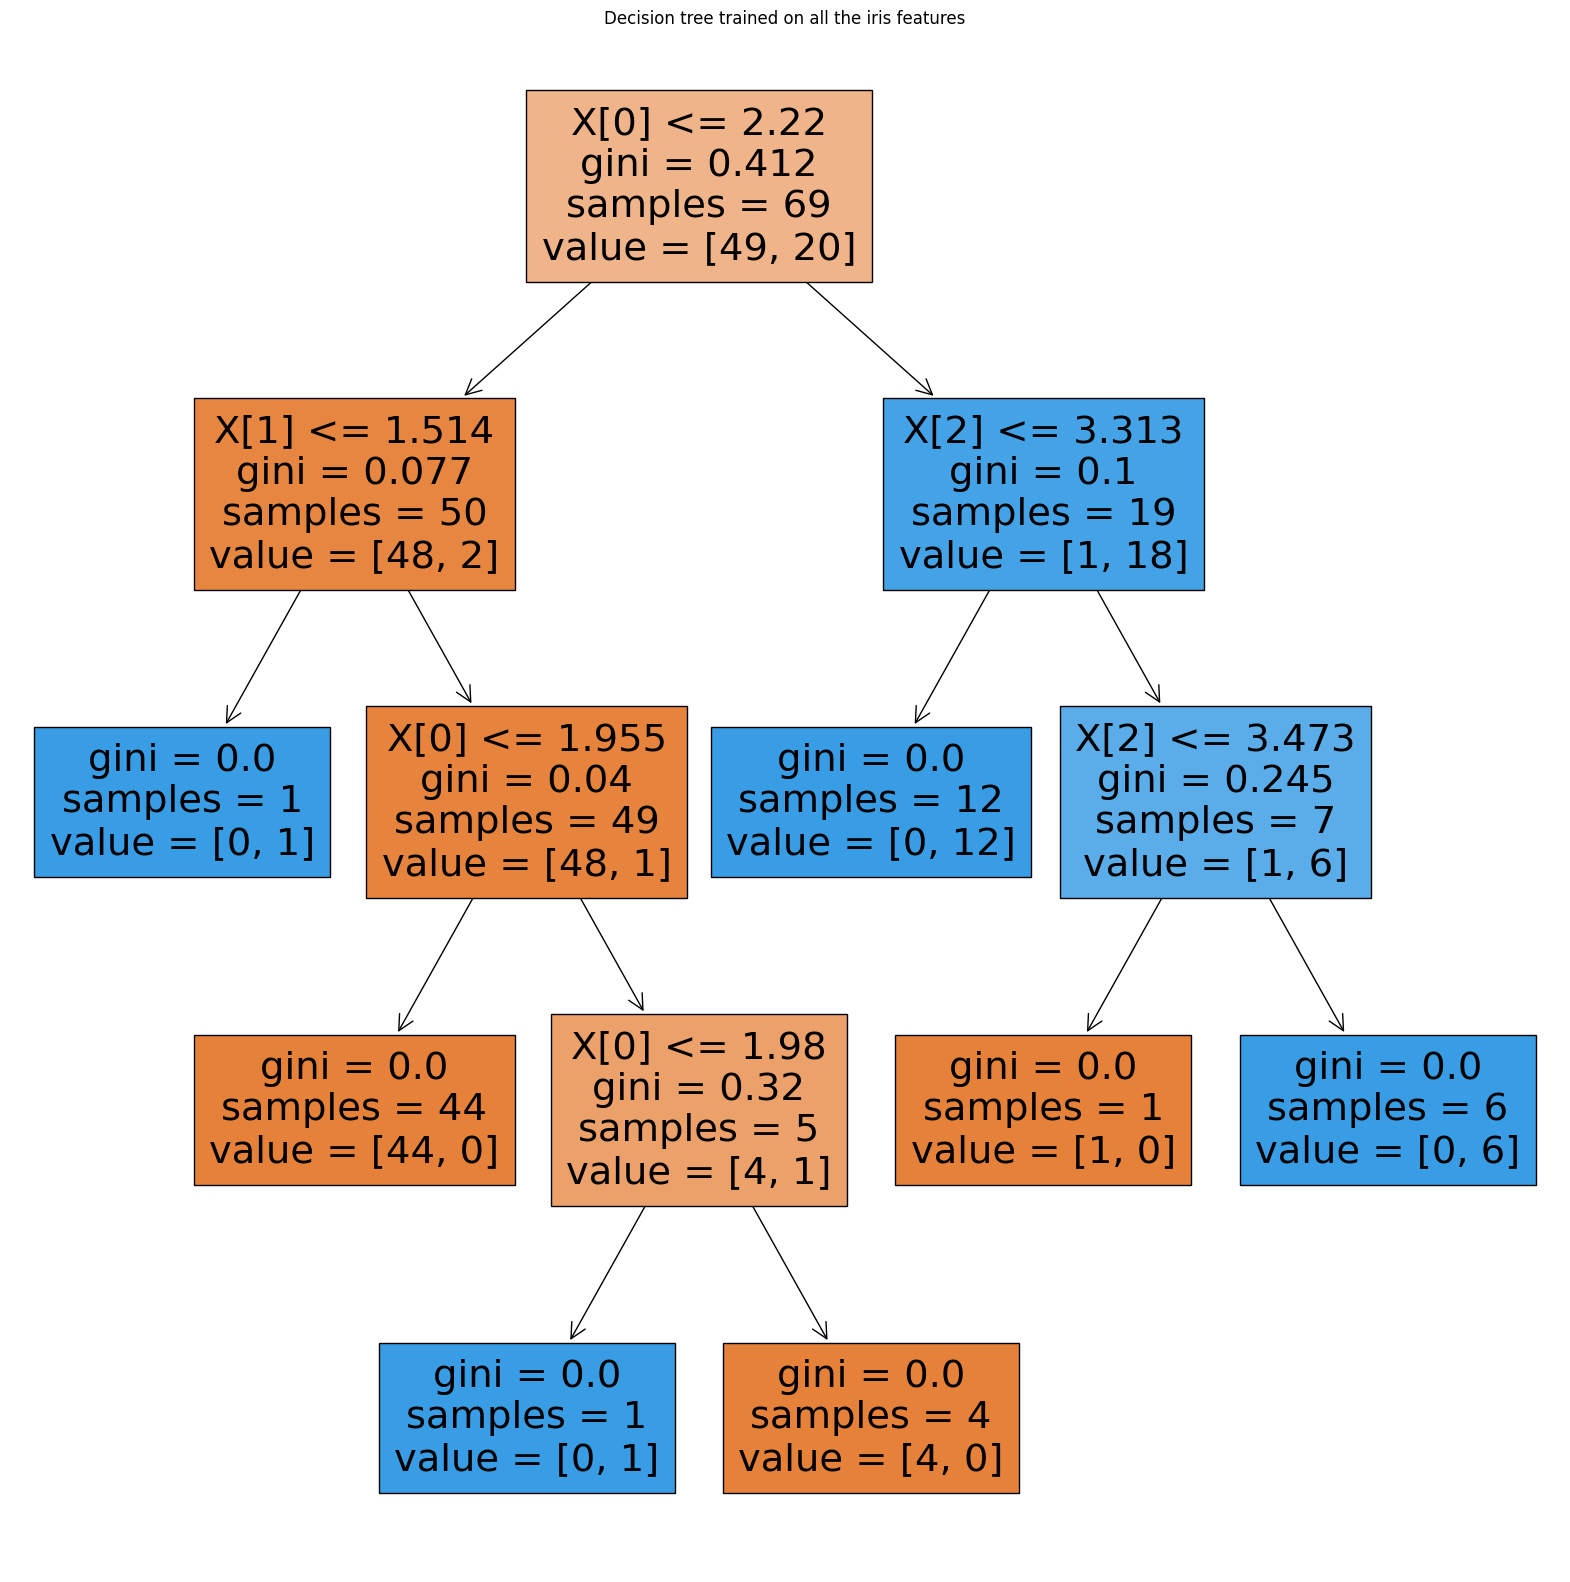

In [30]:
print(f'feature_importance: {model.feature_importances_}')
print(f'tree depth = {model.get_depth()}, number of leaf nodes = {model.get_n_leaves()}, params: {model.get_params()}')

plt.figure(figsize=(20, 20))
plot_tree(model, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [31]:
def evaluate_model(xs, ys):
    y_predicted = model.predict(xs)

    accuracy = metrics.accuracy_score(ys, y_predicted)
    precision = metrics.precision_score(ys, y_predicted)
    recall = metrics.recall_score(ys,y_predicted)

    print("--------------------------------------")
    print('Accuracy is  {}'.format(accuracy))
    print('Precision is {}'.format(precision))
    print('Recall is    {}'.format(recall))
    print("--------------------------------------")
    return accuracy, precision, recall
print("The model performance for training set")
evaluate_model(X_train, y_train)
print("The model performance for testing set")
evaluate_model(X_test, y_test)

The model performance for training set
--------------------------------------
Accuracy is  1.0
Precision is 1.0
Recall is    1.0
--------------------------------------
The model performance for testing set
--------------------------------------
Accuracy is  0.8333333333333334
Precision is 0.8571428571428571
Recall is    0.8
--------------------------------------


(0.8333333333333334, 0.8571428571428571, 0.8)

In [32]:
y_predicted = model.predict(X_test)
# show percentage of different values
pd.Series(y_predicted).value_counts(normalize=True)

False    0.533333
True     0.466667
dtype: float64